In [62]:

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, minimize_scalar
import pylab as plt
from matplotlib import pyplot
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [51]:
filename = "Metazygia wittfeldae Monitor 1 Updated_DD"
df = pd.read_csv(filename + '.csv', index_col = 0)

df

,Light,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 3,Monitor 1 Spider 4,Monitor 1 Spider 5,Monitor 1 Spider 6,Monitor 1 Spider 7,Monitor 1 Spider 8,Monitor 1 Spider 9,...,Monitor 1 Spider 21,Monitor 1 Spider 23,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 27,Monitor 1 Spider 28,Monitor 1 Spider 29,Monitor 1 Spider 30,Monitor 1 Spider 31,Monitor 1 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2017-04-26 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,7,0
2017-04-26 00:01:00,0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,6
2017-04-26 00:02:00,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,3,6
2017-04-26 00:03:00,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,11,0
2017-04-26 00:04:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0


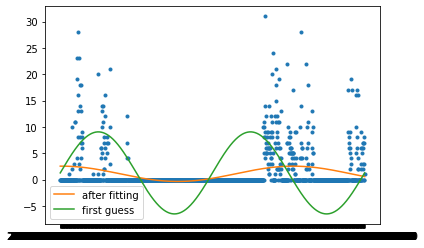

In [61]:
t = np.linspace(0, 4*np.pi, 1440)

guess_freq = 1
guess_amplitude = 3*np.std(df1)/(2**0.5)
guess_phase = 0
guess_offset = np.mean(df1)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

# create the function we want to fit
def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

# now do the fit
fit = curve_fit(my_sin, t, df1, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_sin(t, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_sin(t, *fit[0])

plt.plot(df1, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

In [55]:
df1 = df.loc['2017-04-26 00:00:00' : '2017-04-26 23:59:00']
df1 = df1['Monitor 1 Spider 2']
df1

Date-Time
2017-04-26 00:00:00    0
2017-04-26 00:01:00    0
2017-04-26 00:02:00    0
2017-04-26 00:03:00    0
2017-04-26 00:04:00    0
                      ..
2017-04-26 23:55:00    7
2017-04-26 23:56:00    3
2017-04-26 23:57:00    8
2017-04-26 23:58:00    0
2017-04-26 23:59:00    1
Name: Monitor 1 Spider 2, Length: 1440, dtype: int64

In [30]:
df2 = pd.read_csv(filename + '.csv')
df2 = df2[['Date-Time', 'Monitor 1 Spider 2']]
mask = (df2['Date-Time'] >= '2017-04-26 00:00:00') & (df2['Date-Time'] <= '2017-04-26 23:59:00')
df2 = df2.loc[mask]
#y = df2.values
df2


,Date-Time,Monitor 1 Spider 2
0,2017-04-26 00:00:00,0
1,2017-04-26 00:01:00,0
2,2017-04-26 00:02:00,0
3,2017-04-26 00:03:00,0
4,2017-04-26 00:04:00,0
...,...,...
1435,2017-04-26 23:55:00,7
1436,2017-04-26 23:56:00,3
1437,2017-04-26 23:57:00,8
1438,2017-04-26 23:58:00,0


[ 1.72799936e+02  6.75413953e-01 -4.82567648e-03  1.44137018e+06]


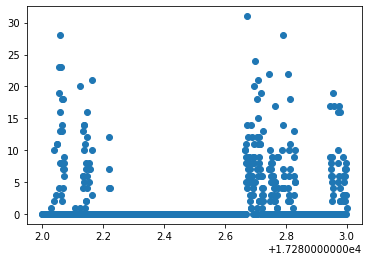

In [48]:
def objective(x, a, b, c, d):
    return a * np.sin(b - x) + c * x**2 + d

dates = df2['Date-Time'].values
x = mdates.date2num(dates)
y = df2['Monitor 1 Spider 2'].values

popt, _ = curve_fit(objective, x, y)
a, b, c, d = popt
print(popt)

pyplot.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c, d)

pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [90]:
df3 = df2.copy()

df3['curve'] = pd.Series(data_fit)
#df3 = df3.set_index('Date-Time')

display(df3)


,Date-Time,Monitor 1 Spider 2,curve
0,2017-04-26 00:00:00,0,2.538392
1,2017-04-26 00:01:00,0,2.538814
2,2017-04-26 00:02:00,0,2.539187
3,2017-04-26 00:03:00,0,2.539512
4,2017-04-26 00:04:00,0,2.539789
...,...,...,...
1435,2017-04-26 23:55:00,7,0.590551
1436,2017-04-26 23:56:00,3,0.582696
1437,2017-04-26 23:57:00,8,0.574858
1438,2017-04-26 23:58:00,0,0.567037


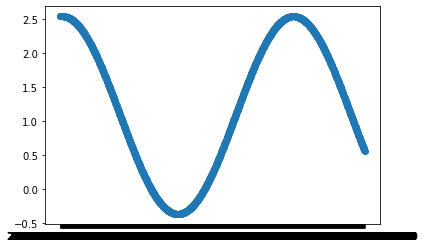

In [91]:
pyplot.scatter(df3['Date-Time'], df3['curve'])

In [116]:
df4 = df3.copy()

df4['Date-Time'] = pd.to_datetime(df4['Date-Time'])
df4 = df4.set_index('Date-Time')
df4 = df4.resample('60min').sum()
df4

,Monitor 1 Spider 2,curve
Date-Time,,
2017-04-26 00:00:00,13,151.407237
2017-04-26 01:00:00,276,142.909781
2017-04-26 02:00:00,22,125.244064
2017-04-26 03:00:00,202,100.494015
2017-04-26 04:00:00,0,71.579268
2017-04-26 05:00:00,27,41.910741
2017-04-26 06:00:00,0,14.988272
2017-04-26 07:00:00,0,-6.012237
2017-04-26 08:00:00,0,-18.613468


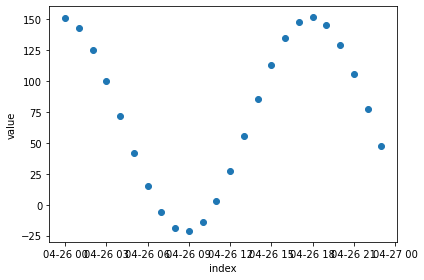

In [105]:
df5 = df4.copy()

df5 = df5['curve']

plt.scatter(df5.index, df5.values)
plt.xlabel("index")
plt.ylabel("value")
plt.tight_layout()
plt.show()

In [168]:
df_bin = pd.read_csv("Metazygia wittfeldae Monitor 1 activity_DD_binary.csv", index_col = 0)
df_bin

df_bin = df_bin[['Date_Time', 's2']]
mask = (df_bin['Date_Time'] >= '2017-06-19 00:00:00') & (df_bin['Date_Time'] <= '2017-06-19 23:59:00')
df_bin = df_bin.loc[mask]


df_bin['Date_Time'] = pd.to_datetime(df_bin['Date_Time'])
df_bin = df_bin.set_index('Date_Time')
df_bin = df_bin.resample('60min').sum()
df_bin

,s2
Date_Time,
2017-06-19 00:00:00,46
2017-06-19 01:00:00,35
2017-06-19 02:00:00,26
2017-06-19 03:00:00,0
2017-06-19 04:00:00,0
2017-06-19 05:00:00,0
2017-06-19 06:00:00,6
2017-06-19 07:00:00,0
2017-06-19 08:00:00,0


In [169]:
percentages = []

for x in df_bin['s2']:
    value = round(x/60, 2)
    #print(value)
    percentages.append(value) 

df_bin['percent'] = percentages
df_bin

,s2,percent
Date_Time,,
2017-06-19 00:00:00,46,0.77
2017-06-19 01:00:00,35,0.58
2017-06-19 02:00:00,26,0.43
2017-06-19 03:00:00,0,0.00
2017-06-19 04:00:00,0,0.00
2017-06-19 05:00:00,0,0.00
2017-06-19 06:00:00,6,0.10
2017-06-19 07:00:00,0,0.00
2017-06-19 08:00:00,0,0.00
